In [1]:
import numpy as np

from scipy import stats
from scipy. stats import skew
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# MISSING DATA

In [5]:
def missing_data(df):
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
     
    cm = sns.light_palette("green", as_cmap=True)

    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).T.style.background_gradient(cmap=cm,axis=1)
    

In [6]:
missing_data(train)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
Total,1453,1406,1369,1179,690,259,81,81,81,81,81,38,38,37,37,37,8,8,1
Percent,99.5205,96.3014,93.7671,80.7534,47.2603,17.7397,5.54795,5.54795,5.54795,5.54795,5.54795,2.60274,2.60274,2.53425,2.53425,2.53425,0.547945,0.547945,0.0684932


In [7]:
missing_data(test)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageQual,GarageYrBlt,GarageFinish,GarageType,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,MasVnrType,MasVnrArea,MSZoning,BsmtHalfBath,Utilities,Functional,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,Exterior2nd,BsmtUnfSF,TotalBsmtSF,SaleType,Exterior1st,KitchenQual,GarageArea,GarageCars
Total,1456,1408,1352,1169,730,227,78,78,78,78,76,45,44,44,42,42,16,15,4,2,2,2,2,1,1,1,1,1,1,1,1,1,1
Percent,99.7944,96.5045,92.6662,80.1234,50.0343,15.5586,5.34613,5.34613,5.34613,5.34613,5.20905,3.0843,3.01576,3.01576,2.87868,2.87868,1.09664,1.0281,0.27416,0.13708,0.13708,0.13708,0.13708,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401


In [8]:
train.shape

(1460, 81)

In [9]:
test.shape

(1459, 80)

In [10]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# FILLING THE NULLS AND NANS

In [11]:
missing_data(train).columns
missing_data(test).columns

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Exterior2nd', 'SaleType', 'Exterior1st', 'KitchenQual',
       'GarageArea', 'GarageCars'],
      dtype='object')

In [12]:
def filling_nans(features):
    none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
    ]
    # List of NaN's including columns where NaN's mean 0.

    zero_cols = [
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
        'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
    ]

    # List of NaN's including columns where NaN's actually missing gonna replaced with mode.

    freq_cols = [
        'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
        'SaleType', 'Utilities'
    ]

    # Filling the list of columns above:

    for col in zero_cols:
        features[col].replace(np.nan, 0, inplace=True)

    for col in none_cols:
        features[col].replace(np.nan, 'None', inplace=True)

    for col in freq_cols:
        features[col].replace(np.nan, features[col].mode()[0], inplace=True)
    # Filling MSZoning according to MSSubClass.

    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].apply(
        lambda x: x.fillna(x.mode()[0]))
    features['LotFrontage'] = features.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [13]:
filling_nans(train)
filling_nans(test)

In [14]:
#CONFIRMING THE ORDER OF COLUMNS IN TRAIN AND TEST
for i, j in zip(train.columns,test.columns):
    if i!=j:
        print (i)

In [15]:
train['MSSubClass'] = train['MSSubClass'].astype(str)

# DROPPING MOST REDUNDANT FEATURES

In [16]:
def freq_values(df):
    percent=[]
    cols=[]
    for col in df.columns:
        percent.append(round(df[col].value_counts().max()/len(df),4))

        cols.append(col)
    return (pd.DataFrame(list(zip(cols,percent)),columns=['Column','Percent']).sort_values(by=["Percent"],ascending=False))

In [17]:
freq_values(train)[freq_values(train)["Percent"]>0.90]

,Column,Percent
8,Utilities,0.9993
4,Street,0.9959
70,PoolArea,0.9952
71,PoolQC,0.9952
13,Condition2,0.9897
68,3SsnPorch,0.9836
21,RoofMatl,0.9822
44,LowQualFinSF,0.9822
38,Heating,0.9781
74,MiscVal,0.9644


The above table has feature columns where :
    for example in Utilities Column ,Only one value is repeated 99.93% cases(AllPub), 
    thats why that column can be dropped out,as it does not add so much value in the regression. Similarly others

In [18]:
col_to_drop=[]
for i in freq_values(train)[freq_values(train)["Percent"]>0.90][["Column"]].values:
    col_to_drop.append(i[0])

In [19]:
train=train.drop(columns=col_to_drop,axis=1)

In [20]:
test=test.drop(columns=col_to_drop,axis=1)

In [21]:
train.shape

(1460, 59)

In [22]:
test.shape

(1459, 58)

# PLOTS

In [23]:
categor_vari=[]
for i, var in enumerate(train.columns):
    if(train[var].nunique()<25) and type(train[var][0])==type("stpr"):
        categor_vari.append(var)

In [24]:
np.array(categor_vari)

array(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Fence',
       'SaleType', 'SaleCondition'], dtype='<U13')

In [25]:
def cat_plt(y, df):
    sns.set(font_scale=2) 
    fig, axes = plt.subplots(18, 2, figsize=(25, 150))
    axes = axes.flatten()

    for i, j in zip(categor_vari, axes):

        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='cubehelix',
                    
                    ax=j)
        j.tick_params(labelrotation=45)

        plt.tight_layout()

**Observations:**

 - **MSZoning: Identifies the general zoning classification of the sale** A Fv gives the highest Saleprice
 - **LandContour: Flatness of the property** Hillside houses seems a little bit higher expensive than the rest meanwhile banked houses are the lowest
 - **Conditions: Proximity to various conditions**Meanwhile having wide range of values being close to North-South Railroad seems having positive effect on the price. Within 200' of North-South Railroad
 - **ExterQual: Evaluates the quality of the material on the exterior** This is one of the most sought feature which should be excellent
 - **BsmtQual: Evaluates the height of the basement** This is another most sought feature which should be excellent


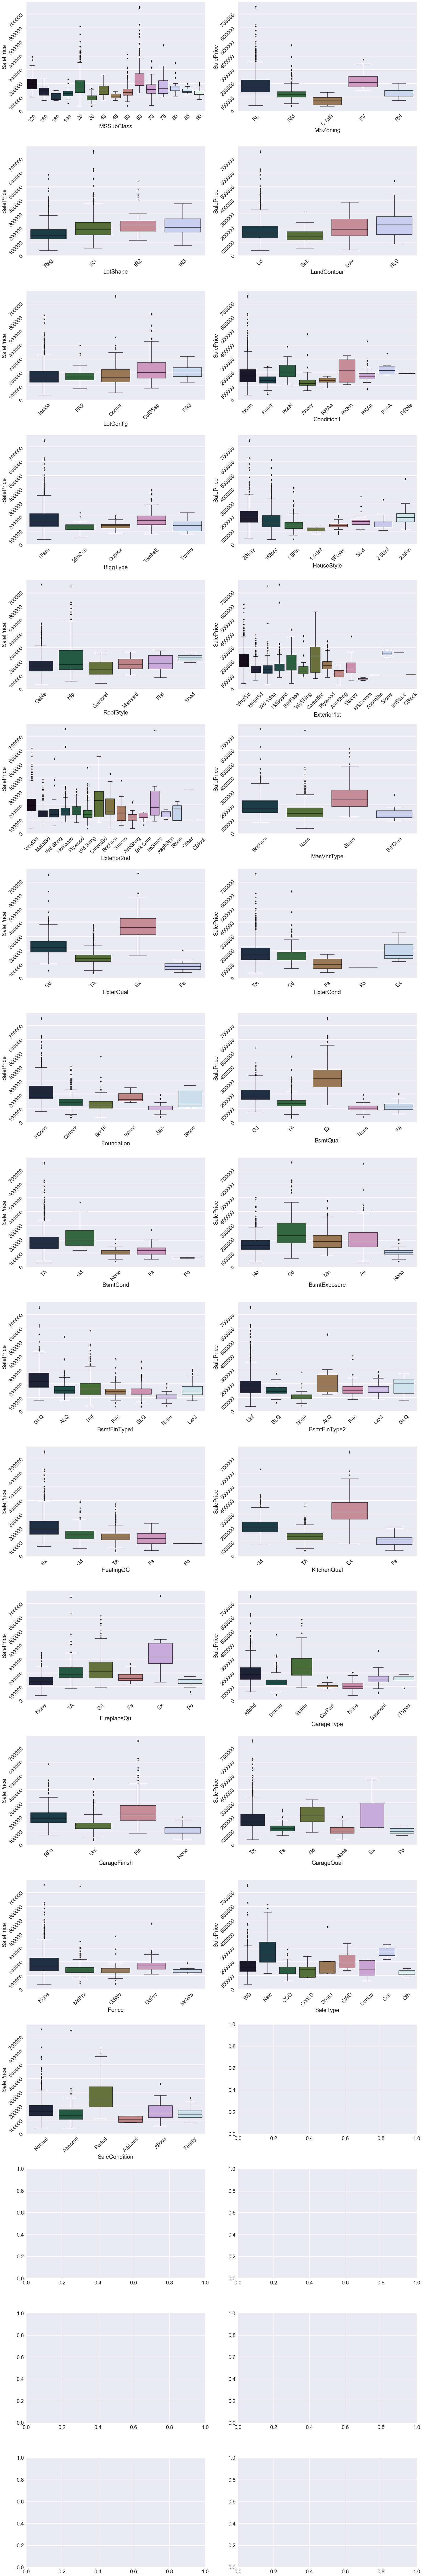

In [26]:
cat_plt("SalePrice",train)

In [27]:
ordinal_vari=[]
for i, var in enumerate(train.columns):
    if(train[var].nunique()<25) and type(train[var][0])!=type("stpr"):
        ordinal_vari.append(var)

In [28]:
def cat_plt(y, df):
    sns.set(font_scale=2) 
    fig, axes = plt.subplots(6, 2, figsize=(25, 60))
    axes = axes.flatten()

    for i, j in zip(ordinal_vari, axes):

        sns.barplot(x=i,
                    y=y,
                    data=df,
                    palette='cubehelix',
                    
                    ax=j)
        
        j.tick_params(labelrotation=45)

        plt.tight_layout()

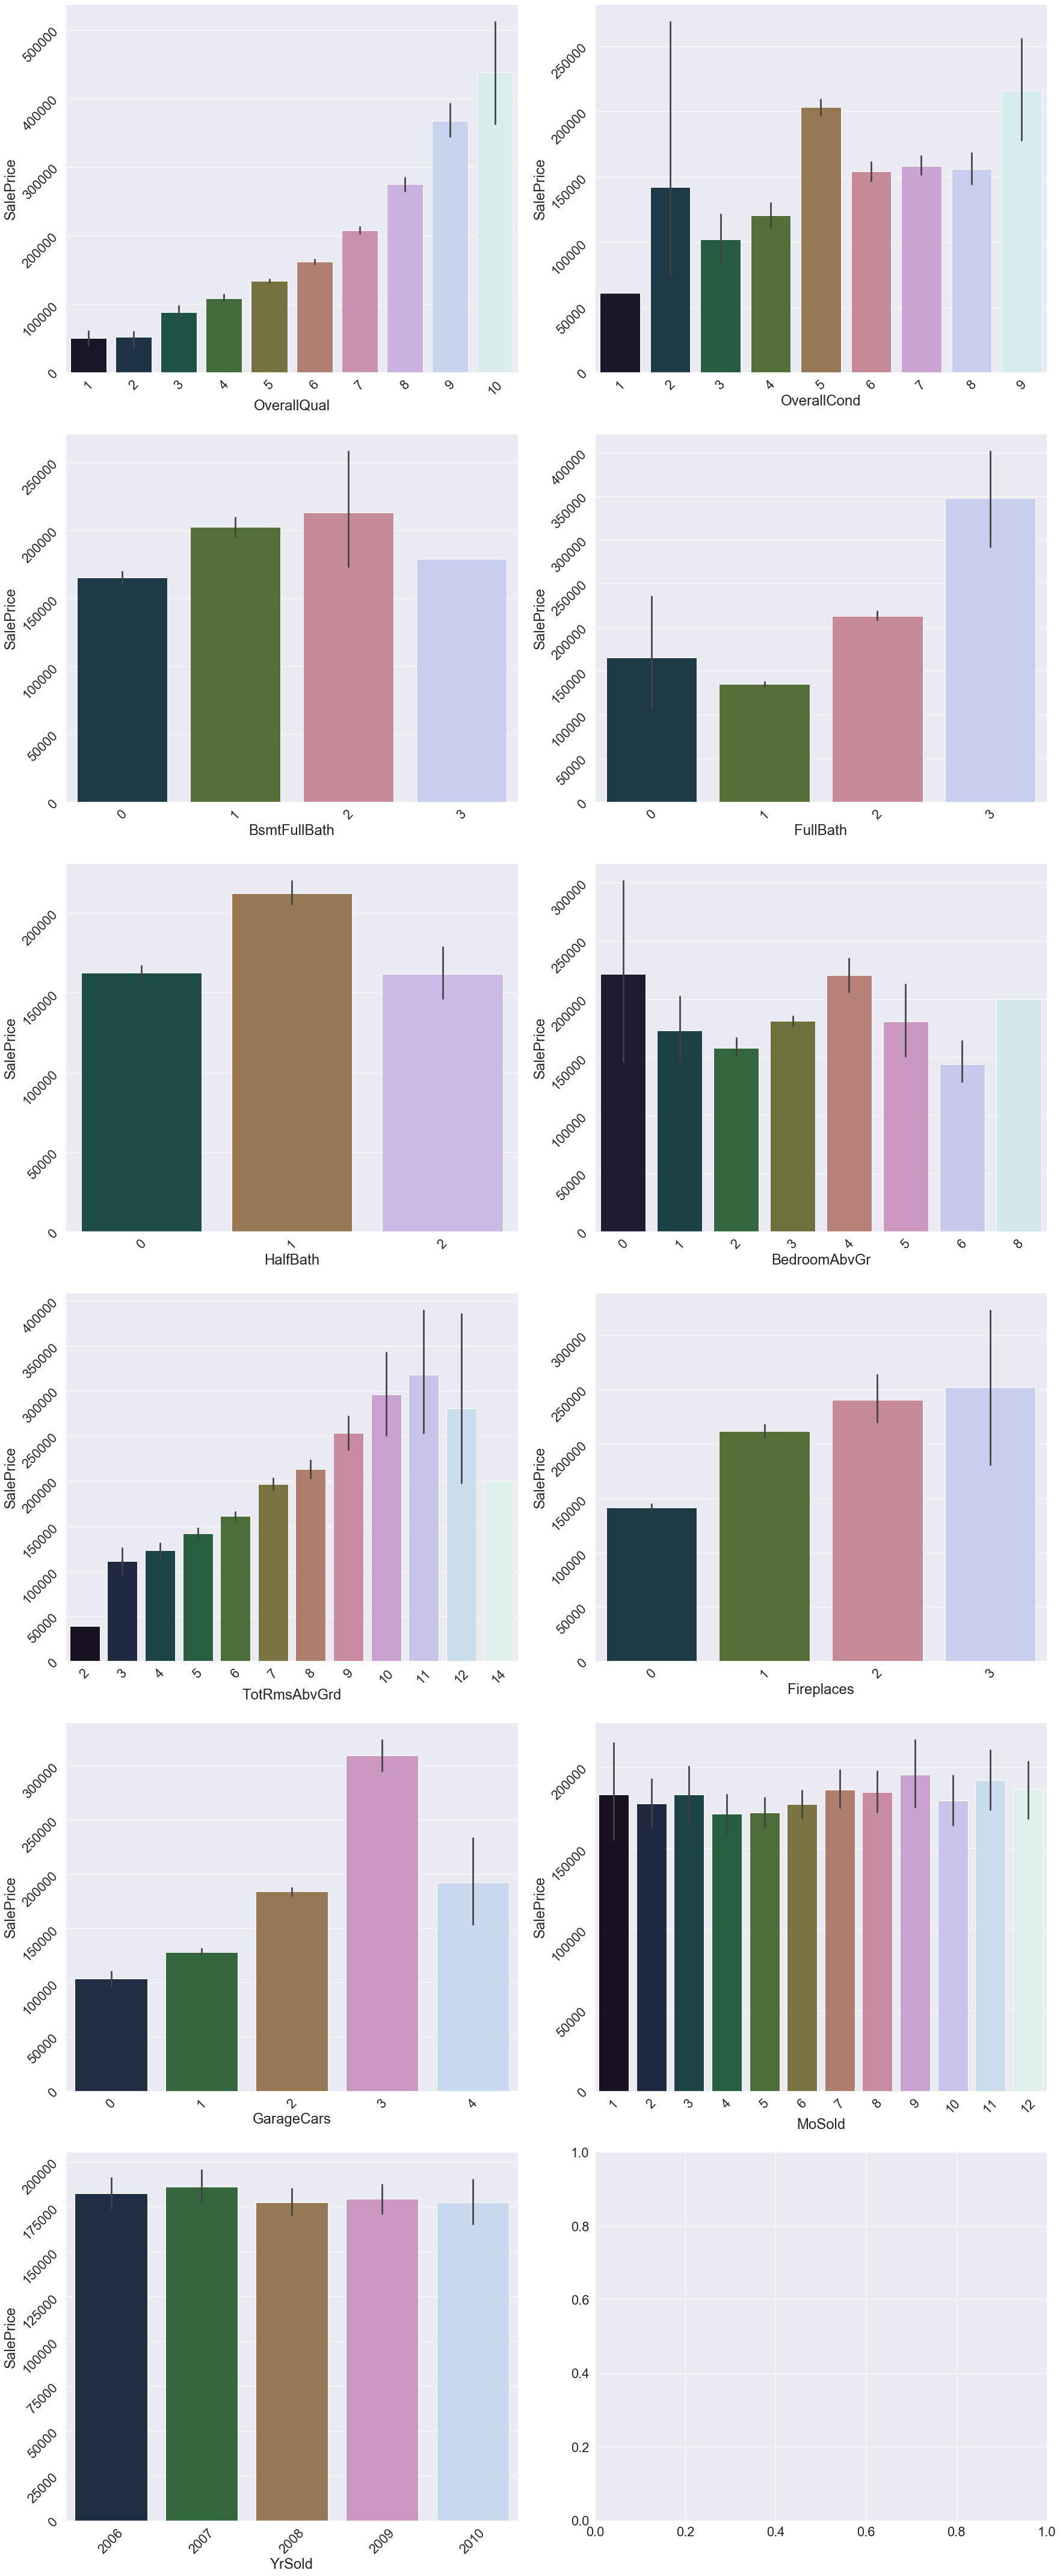

In [29]:
cat_plt("SalePrice",train)

In [30]:
reg_vari=[]
for i, var in enumerate(train.columns):
    if(train[var].nunique()>25):
        reg_vari.append(var)

In [31]:
train_without_outlier=train[reg_vari][np.all(stats.zscore(train[reg_vari]) < 2, axis=1)]

In [32]:
def cat_plt(y, df,n):
    sns.set(font_scale=2) 
    fig, axes = plt.subplots(int(n/2), 2, figsize=(25, n*5))
    axes = axes.flatten()

    for i, j in zip(reg_vari, axes):

        
        sns.regplot(x=i, y=y, data=df,
                 scatter_kws={"s": 80,'alpha':0.6,"color": "black"},
                 order=2, ci=None, line_kws={"color": "red"},ax=j)
        
        j.tick_params(labelrotation=45)

        plt.tight_layout()


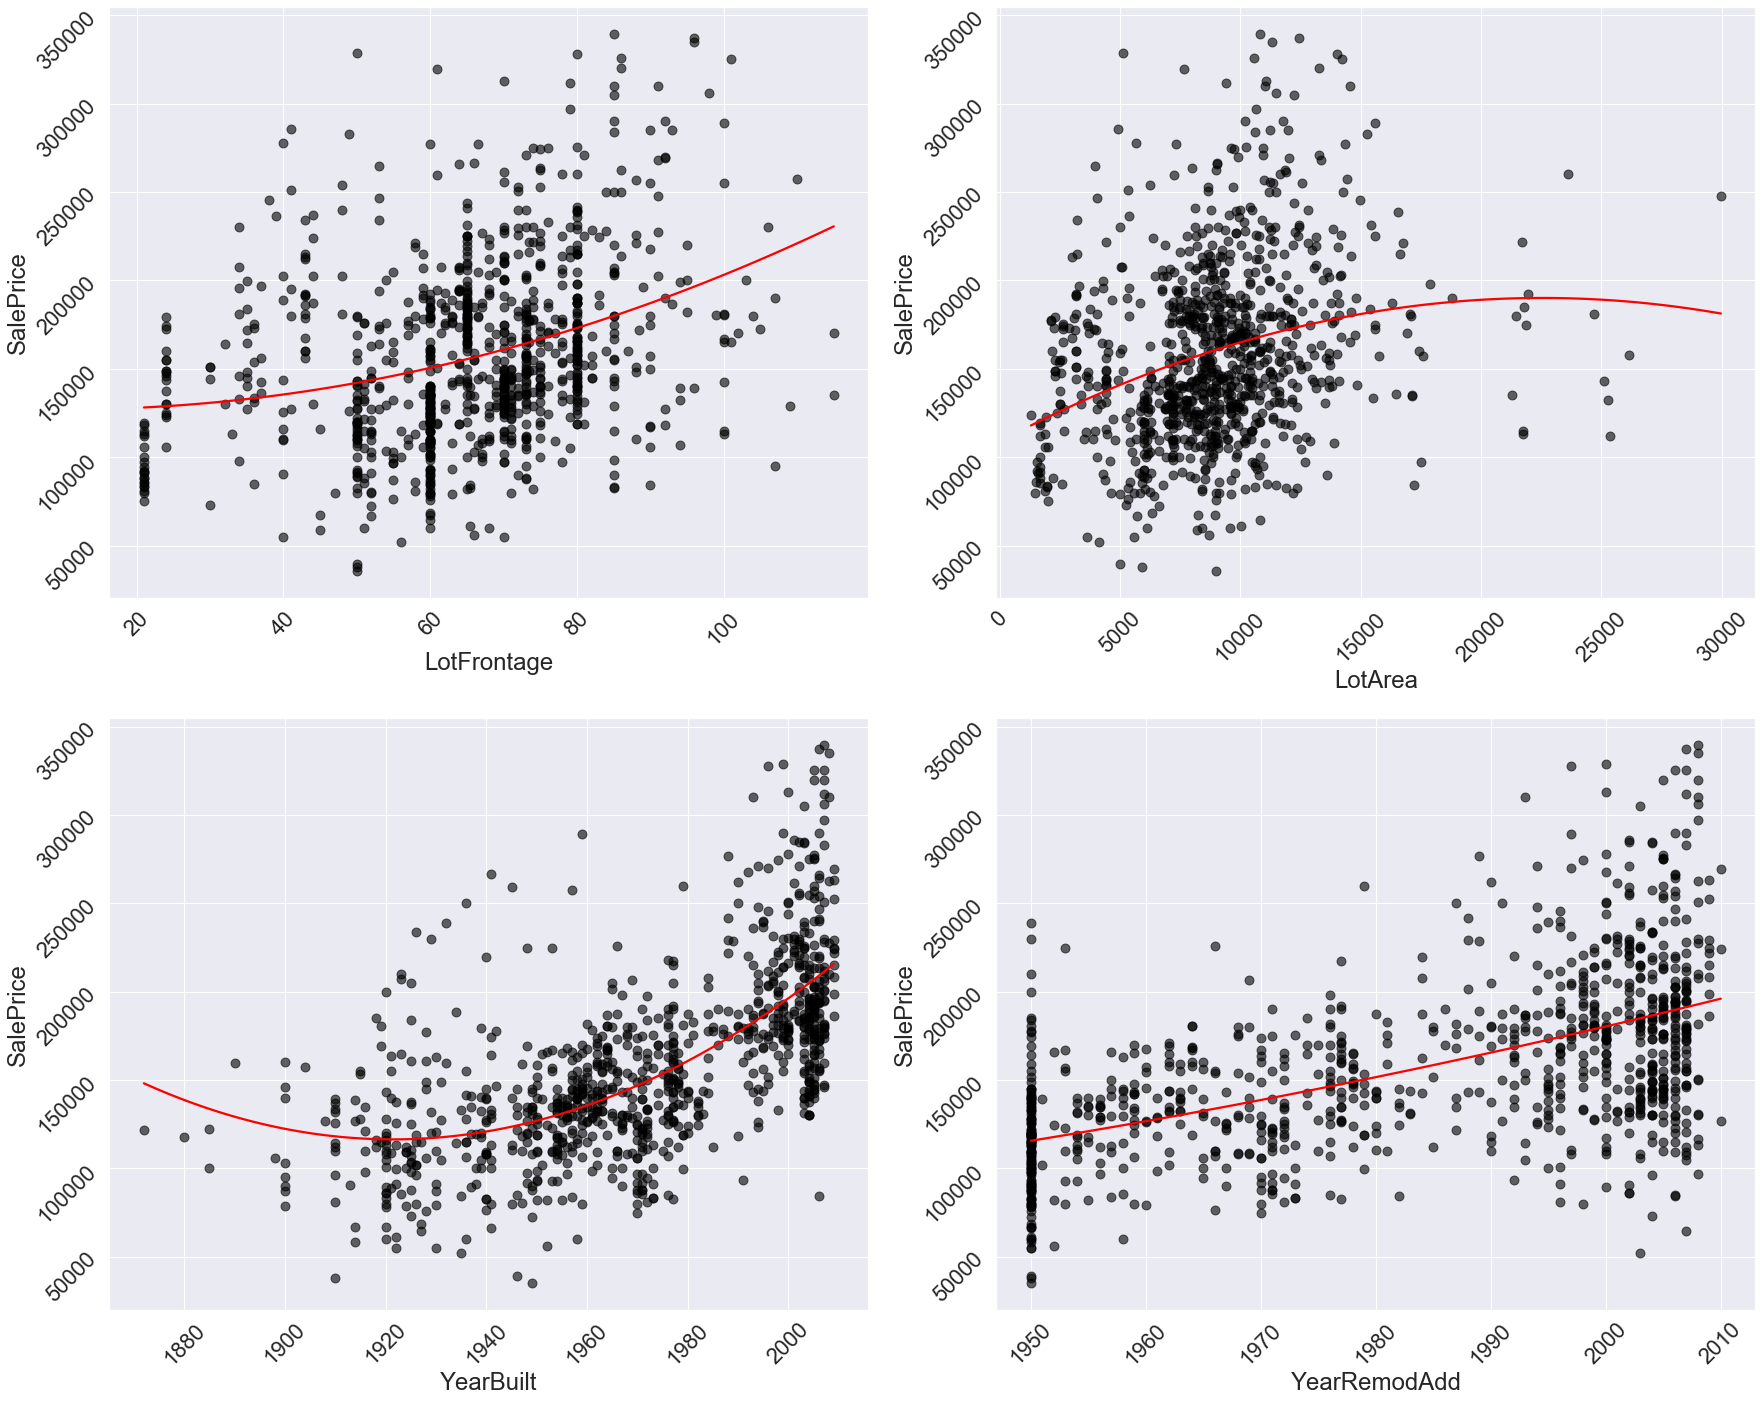

In [33]:
cat_plt("SalePrice",train_without_outlier,4)

# ADDING NEW FEATURES

In [34]:
train.shape

(1460, 59)

In [35]:
test.shape

(1459, 58)

In [36]:
def ad_feature(features):
    features['TotalSF'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                       features['1stFlrSF'] + features['2ndFlrSF'])
    features['TotalBathrooms'] = (features['FullBath'] +
                                  (0.5 * features['HalfBath']) +
                                  features['BsmtFullBath'] )

    features['TotalPorchSF'] = (features['OpenPorchSF'] +
                                features['EnclosedPorch'] +
                                 features['WoodDeckSF'])
    features["TotalYr"]= features["YrSold"]-features["YearRemodAdd"]


In [37]:
ad_feature(train)
ad_feature(test)

In [38]:
train.shape

(1460, 63)

In [39]:
test.shape

(1459, 62)

# ORDINAL ENCODING

In [40]:
sixlevelencoding=["Ex","Gd","TA","Fa","Po","None"]
sixlevelencoding[::-1]

sixlevelvar=["GarageQual","FireplaceQu","BsmtCond","BsmtQual",\
             "KitchenQual","HeatingQC","ExterCond","ExterQual"]

In [41]:
def ord_enc(df):
    sixlevelencoding=["Ex","Gd","TA","Fa","Po","None"]
    sixlevelencoding=sixlevelencoding[::-1]
    encoder=OrdinalEncoder(categories=[sixlevelencoding])
    for var in sixlevelvar:
    
        df[var]=encoder.fit_transform(np.array(df[var]).reshape(-1, 1))

In [42]:
ord_enc(train)
ord_enc(test)

In [43]:
def mapf(features):
    map_Neighborhood={
        'MeadowV': 1,        'IDOTRR': 1,        'BrDale': 1,        'BrkSide': 2,        'OldTown': 2,        'Edwards': 2,
        'Sawyer': 3,        'Blueste': 3,        'SWISU': 3,        'NPkVill': 3,        'NAmes': 3,        'Mitchel': 4,
        'SawyerW': 5,        'NWAmes': 5,        'Gilbert': 5,        'Blmngtn': 5,        'CollgCr': 5,        'ClearCr': 6,        'Crawfor': 6,        'Veenker': 7,        'Somerst': 7,
        'Timber': 8,        'StoneBr': 9,        'NridgHt': 10,        'NoRidge': 10    }
    map_Fence={"GdPrv":4,       "MnPrv":3    ,   "GdWo":2,               "MnWw":1    ,   "None":0          }

    
    map_GarageFinish={'RFn':3, 'Unf':2, 'Fin':1, 'None':0}
    map_BsmtExposure={'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'None':0}
    map_LotShape={'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}
    map_BsmtFinType2={ 'GLQ':7, 'ALQ':6, 'Unf':1, 'Rec':4, 'BLQ':5, 'None':0, 'LwQ':2}
    map_BsmtFinType1={ 'GLQ':7, 'ALQ':6, 'Unf':1, 'Rec':4, 'BLQ':5, 'None':0, 'LwQ':2}

    features['Neighborhood'] = features['Neighborhood'].map(map_Neighborhood).astype(
        'int')
    features['Fence'] = features['Fence'].map(map_Fence).astype(
        'int')

    
    features['GarageFinish'] = features['GarageFinish'].map(map_GarageFinish).astype(
        'int')
    features['BsmtExposure'] = features['BsmtExposure'].map(map_BsmtExposure).astype(
        'int')
    features['LotShape'] = features['LotShape'].map(map_LotShape).astype(
        'int')   
    features['BsmtFinType2'] = features['BsmtFinType2'].map(map_BsmtFinType2).astype(
        'int')
    features['BsmtFinType1'] = features['BsmtFinType1'].map(map_BsmtFinType1).astype(
        'int')

In [44]:
mapf(train)
mapf(test)

In [45]:
train[train.select_dtypes(include=['object']).columns].head()

,MSSubClass,MSZoning,LandContour,LotConfig,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleType,SaleCondition
0,60,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
1,20,RL,Lvl,FR2,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,WD,Normal
2,60,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
3,70,RL,Lvl,Corner,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Detchd,WD,Abnorml
4,60,RL,Lvl,FR2,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal


# VISUALIZING NEW FEATURES

In [46]:
train["log"]=np.log(train["SalePrice"])

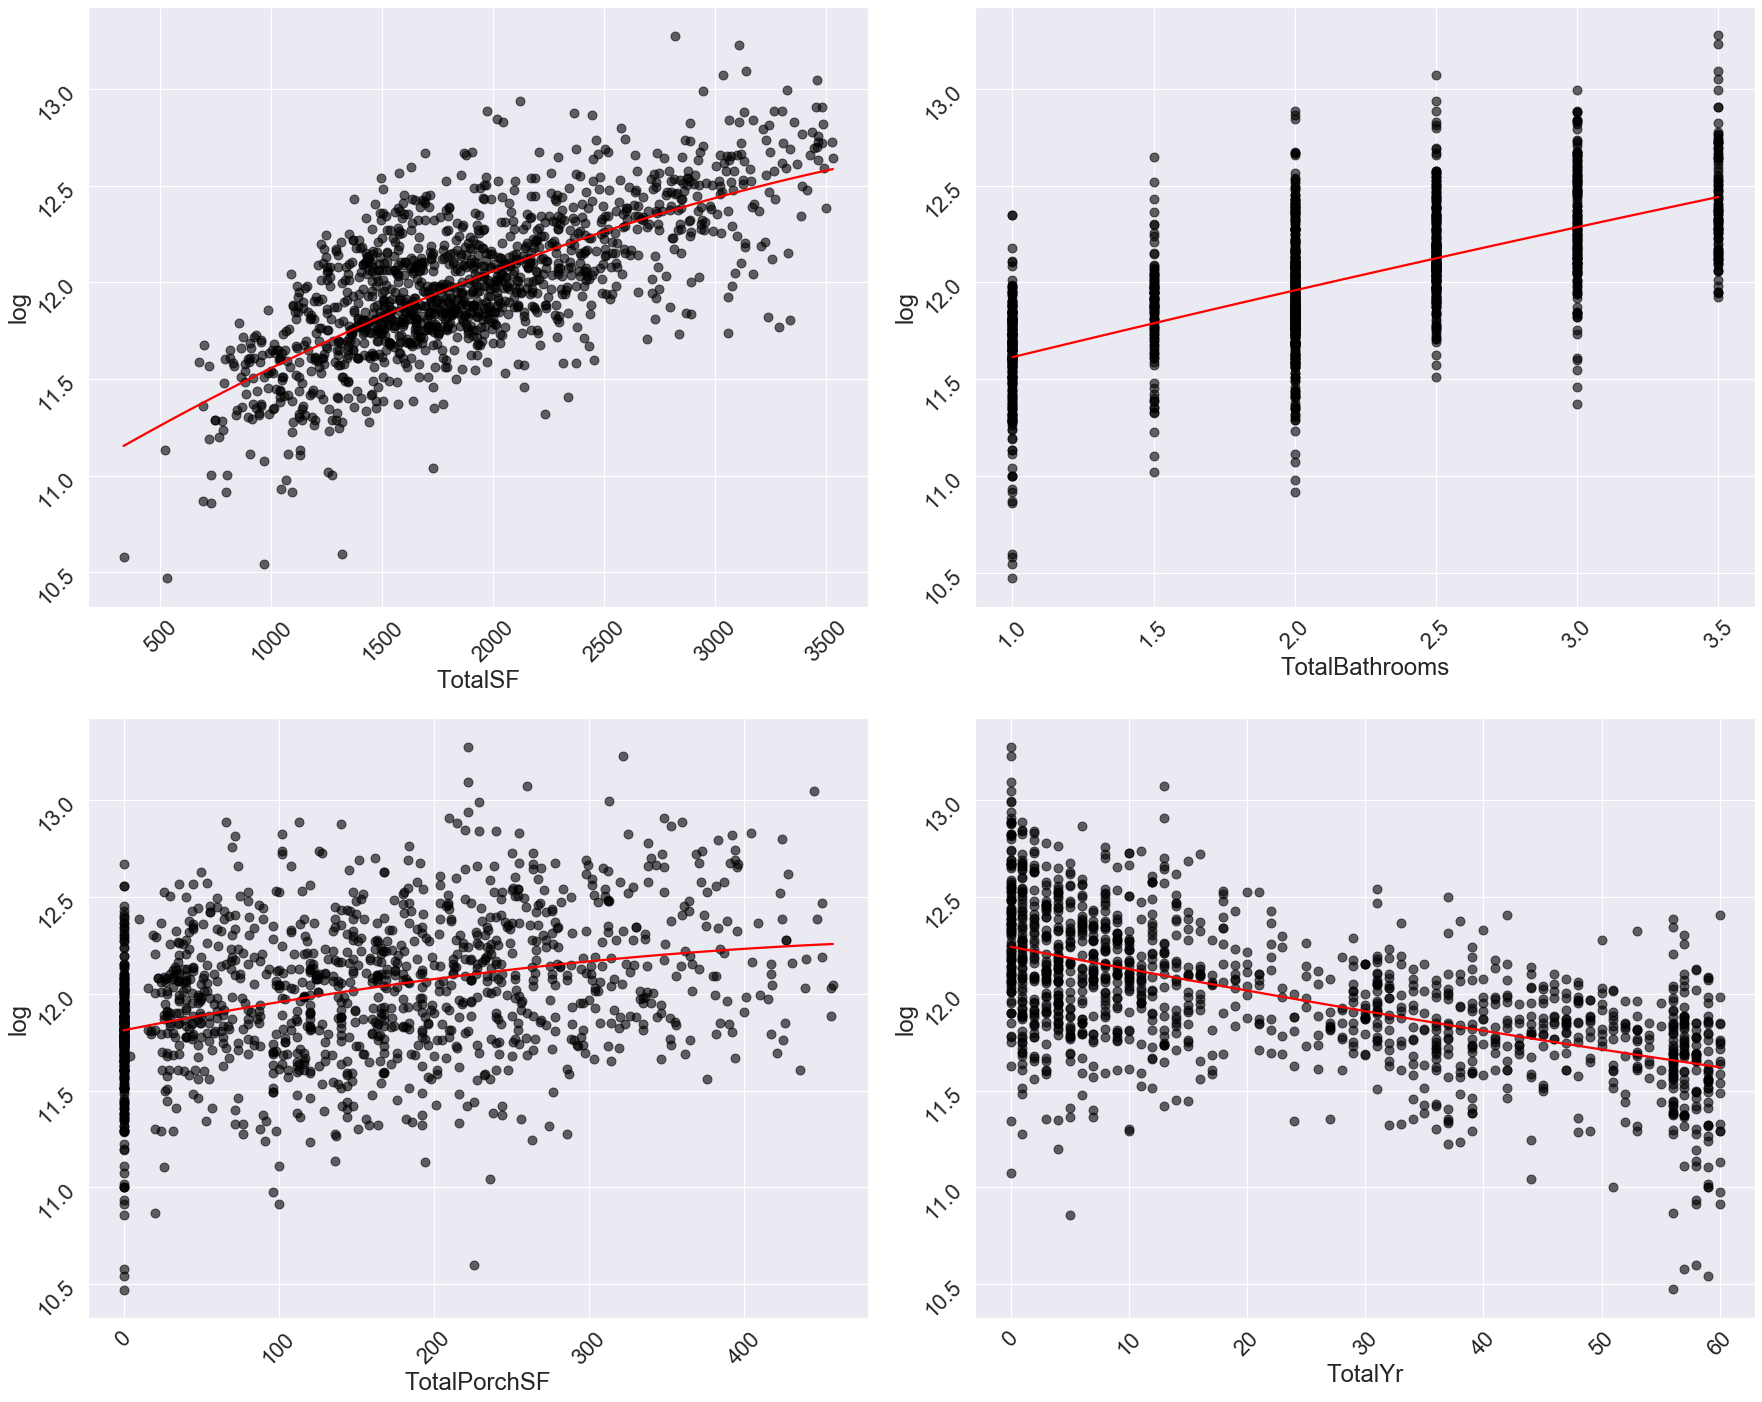

In [47]:
reg_vari=["TotalSF","TotalBathrooms","TotalPorchSF","TotalYr"]
cat_plt("log",train[["TotalSF","TotalBathrooms","TotalPorchSF","TotalYr","log"]]\
        [np.all(stats.zscore(train[reg_vari]) < 2, axis=1)],4)

In [48]:
# Here if we are taking a log transformation of the Saleprice we see more linearity in the above graphs
#ref https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

# MODELLING

### SKEWNESS AND BOXCOX TRANSFORMATION

In [49]:
#ref-https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd


Normally we dont need independent variables to be normally distributed, but 
check the distribution of the error term after the model has being built. 
If dependent variables or independent variables are very non-normal 
then can use box-cox transformation to transform it to make error term more normally distributed.

In [50]:
# NOW LET US CHECK THE SKEWNESS OF THE INDEPENDENT VARIABLES

In [51]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,TotalPorchSF,TotalYr,log
0,60,RL,65.0,8450,3,Lvl,Inside,5,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4.0,3.0,PConc,4.0,3.0,1,7,706,1,0,150,856,5.0,856,854,1710,1,2,1,3,4.0,8,0,0.0,Attchd,2003.0,3,2,548,3.0,0,61,0,0,2,2008,WD,Normal,208500,2416,3.5,61,5,12.247694
1,20,RL,80.0,9600,3,Lvl,FR2,7,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3.0,3.0,CBlock,4.0,3.0,4,6,978,1,0,284,1262,5.0,1262,0,1262,0,2,0,3,3.0,6,1,3.0,Attchd,1976.0,3,2,460,3.0,298,0,0,0,5,2007,WD,Normal,181500,2240,2.0,298,31,12.109011
2,60,RL,68.0,11250,2,Lvl,Inside,5,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4.0,3.0,PConc,4.0,3.0,2,7,486,1,0,434,920,5.0,920,866,1786,1,2,1,3,4.0,6,1,3.0,Attchd,2001.0,3,2,608,3.0,0,42,0,0,9,2008,WD,Normal,223500,2272,3.5,42,6,12.317167
3,70,RL,60.0,9550,2,Lvl,Corner,6,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3.0,3.0,BrkTil,3.0,4.0,1,6,216,1,0,540,756,4.0,961,756,1717,1,1,0,3,4.0,7,1,4.0,Detchd,1998.0,2,3,642,3.0,0,35,272,0,2,2006,WD,Abnorml,140000,1933,2.0,307,36,11.849398
4,60,RL,84.0,14260,2,Lvl,FR2,10,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4.0,3.0,PConc,4.0,3.0,3,7,655,1,0,490,1145,5.0,1145,1053,2198,1,2,1,4,4.0,9,1,3.0,Attchd,2000.0,3,3,836,3.0,192,84,0,0,12,2008,WD,Normal,250000,2853,3.5,276,8,12.429216


In [52]:
train.drop(columns=["YearBuilt","YearRemodAdd"],inplace=True)
test.drop(columns=["YearBuilt","YearRemodAdd"],inplace=True)

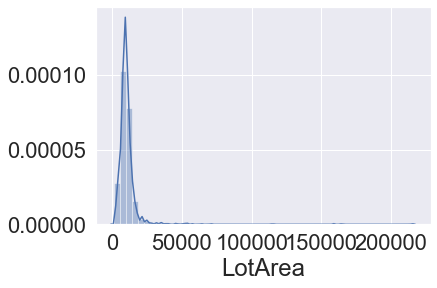

In [53]:
sns.distplot(train["LotArea"])

In [54]:
def skew_var(df):
    high_skewed=[]
    for  var in df.columns:
        if(df[var].nunique()>25):
            high_skewed.append(var)
    return high_skewed

In [55]:
def box_cox(df):
    skew_features=np.abs(df[skew_var(df)].apply(lambda x: skew(x)).sort_values(ascending=False))
    # Filtering skewed features.
    high_skew = skew_features[skew_features > 0.3]
    # Taking indexes of high skew.

    skew_index =high_skew.index
    for i in skew_index:
        df[i] = boxcox1p(df[i], 0.15)

In [56]:
tep=train.drop(columns=["SalePrice","log"])

In [57]:
box_cox(tep)

In [58]:
box_cox(test)

In [59]:
tep.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBathrooms,TotalPorchSF,TotalYr
0,60,RL,5.831328,19.212182,3,Lvl,Inside,5,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,8.059126,4.0,3.0,PConc,4.0,3.0,1,7,11.170327,1,0.0,7.483296,11.692623,5.0,11.692623,11.686189,13.698888,1,2,1,3,4.0,8,0,0.0,Attchd,14.187527,3,2,548,3.0,0.000000,5.714669,0.000000,0,2,2008,WD,Normal,14.781997,3.5,5.714669,2.055642
1,20,RL,6.221214,19.712205,3,Lvl,FR2,7,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.000000,3.0,3.0,CBlock,4.0,3.0,4,6,12.062832,1,0.0,8.897844,12.792276,5.0,12.792276,0.000000,12.792276,0,2,0,3,3.0,6,1,3.0,Attchd,14.145138,3,2,460,3.0,9.010206,0.000000,0.000000,0,5,2007,WD,Normal,14.540127,2.0,9.010206,4.545286
2,60,RL,5.914940,20.347241,2,Lvl,Inside,5,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,7.646538,4.0,3.0,PConc,4.0,3.0,2,7,10.200343,1,0.0,9.917060,11.892039,5.0,11.892039,11.724598,13.832085,1,2,1,3,4.0,6,1,3.0,Attchd,14.184404,3,2,608,3.0,0.000000,5.053371,0.000000,0,9,2008,WD,Normal,14.585277,3.5,5.053371,2.259674
3,70,RL,5.684507,19.691553,2,Lvl,Corner,6,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.000000,3.0,3.0,BrkTil,3.0,4.0,1,6,8.274266,1,0.0,10.468500,11.354094,4.0,12.013683,11.354094,13.711364,1,1,0,3,4.0,7,1,4.0,Detchd,14.179714,2,3,642,3.0,0.000000,4.745132,8.797736,0,2,2006,WD,Abnorml,14.076603,2.0,9.080098,4.792130
4,60,RL,6.314735,21.325160,2,Lvl,FR2,10,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,9.391827,4.0,3.0,PConc,4.0,3.0,3,7,10.971129,1,0.0,10.221051,12.510588,5.0,12.510588,12.271365,14.480029,1,2,1,4,4.0,9,1,3.0,Attchd,14.182841,3,3,836,3.0,8.013884,6.314735,0.000000,0,12,2008,WD,Normal,15.323415,3.5,8.831514,2.602594


In [60]:
tep["SalePrice"]=train["SalePrice"]
tep["log"]=train["log"]

In [61]:
train=tep.copy()

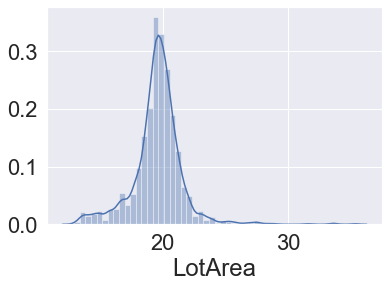

In [62]:
sns.distplot(train["LotArea"])

In [63]:
train.shape

(1460, 62)

In [64]:
test.shape

(1459, 60)

### GET DUMMIES

In [65]:
# Getting dummies for nominal variables
for_dummies=[]
for i in train.columns:
    if type(train[i][0])==type("ad"):
        for_dummies.append(i)

In [66]:
train_1=pd.get_dummies(data=train, columns=for_dummies)
test_1=pd.get_dummies(data=test, columns=for_dummies)

In [67]:
test.Exterior1st.unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'CemntBd',
       'WdShing', 'BrkFace', 'AsbShng', 'BrkComm', 'Stucco', 'AsphShn',
       'CBlock'], dtype=object)

In [68]:
test.Exterior2nd.unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'Brk Cmn',
       'CmentBd', 'ImStucc', 'Wd Shng', 'AsbShng', 'Stucco', 'CBlock',
       'BrkFace', 'AsphShn', 'Stone'], dtype=object)

In [69]:
test.HouseStyle.unique()

array(['1Story', '2Story', 'SLvl', '1.5Fin', 'SFoyer', '2.5Unf', '1.5Unf'],
      dtype=object)

In [70]:
train.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [71]:
train_1.shape

(1460, 167)

In [72]:
test_1.shape

(1459, 162)

In [73]:
#WE FOUND THAT FEW FEATURES ARE NOT PRESENT IN TEST SET SO WE ADD A DUMMY COLUMN SO AS TO MAKE BOTH OF THEM HAVE SAME COLUMNS

In [74]:
for i in train_1.columns:
    if i not in test_1.columns:
        print (i)

SalePrice
log
HouseStyle_2.5Fin
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other


In [75]:
test_1["Exterior2nd_Other"]=0
test_1["Exterior1st_ImStucc"]=0
test_1["Exterior1st_Stone"]=0
test_1["HouseStyle_2.5Fin"]=0

In [76]:
test_1.shape

(1459, 166)

In [77]:
for i in test_1.columns:
    if i not in train_1.columns:
        print (i)

MSSubClass_150


In [78]:
train_1["MSSubClass_150"]=0

In [79]:
train_1.shape

(1460, 168)

### ENSEMBLING THE REGRESSORS

In [196]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, TweedieRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import cross_validate

#### BASE MODELS

In [103]:
# Setting kfold for future use.

kf = KFold(10, random_state=42)

In [104]:
#Initializing Models

In [105]:
# ridge_cv:Ridge regression with built-in cross-validation.
#Because in  regression the value of the coefficients is partially 
#determined by the scale of the feature, and in regularized models all coefficients are summed together,
#we must make sure to standardize the feature prior to training.

# Why do we need alpha? Here in ridge we need alpha value which gives us the least overfitting.
"""you can use RidgeCV and pass a list of alphas, which will be selected based on the 
cross-validation score of each alpha. This visualizer wraps a “RegressionCV” model 
and visualizes the alpha/error curve. Use this visualization to detect if the model is responding to regularization, 
e.g. as you increase or decrease alpha, the model responds and error is decreased. 
If the visualization shows a jagged or random plot, then potentially the model is not sensitive 
to that type of regularization and another is required (e.g. L1 or Lasso regularization)
"""


ridge = make_pipeline(RobustScaler(), RidgeCV(
    alphas=np.logspace(-3, 2, 25),
    cv=kf,
))


In [172]:
# lasso_cv:
# ref https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

lasso = make_pipeline(RobustScaler(),
    
    LassoCV(max_iter=1e7, alphas=np.logspace(-4, 0, 25), random_state=42, cv=kf))

In [128]:
# elasticnet_cv:
"""For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2 This parameter can be a list, 
in which case the different values are tested by cross-validation and the one giving the best prediction score
is used. Note that a good choice of list of values for l1_ratio is often to put more values close 
to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1]"""


elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(max_iter=1e7,
                 alphas=[
    0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007
],
                 cv=kf,
                 random_state=42,
                 l1_ratio=[.1, .5, .7, .9, .95, .99, 1]))

In [130]:
# gradientboosting:

gbr = GradientBoostingRegressor(n_estimators=3000,
                                learning_rate=0.0161,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=20,
                                loss='huber',
                                random_state=42)

In [131]:
#ref https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc


lightgbm = LGBMRegressor(objective='regression',
                         n_estimators=3500,
                         num_leaves=9,
                         learning_rate=0.00721,
                         max_bin=163,
                         bagging_fraction=0.35711,
                         n_jobs=-1,
                         bagging_seed=42,
                         feature_fraction_seed=42,
                         bagging_freq=7,
                         feature_fraction=0.1294,
                         min_data_in_leaf=8)


In [197]:
#XGBoost
xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,verbose=0, verbose_eval=False)

In [133]:
"""the method is no different from ordinary ridge regression on transformations of regressors, 
except for an algebraic trick to improve computational efficiency."""


krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [134]:
# histgradientboost:

hgrd= HistGradientBoostingRegressor(    loss= 'least_squares',
    max_depth= 2,
    min_samples_leaf= 40,
    max_leaf_nodes= 29,
    learning_rate= 0.15,
    max_iter= 225)

In [243]:
#Checking Individual Model score

X_train=train_1.drop(columns=["SalePrice","log"])
y_train=train_1["log"]

models=[ridge,lasso,elasticnet,gbr,lightgbm,krr,hgrd]
names=["ridge","lasso","elasticnet","gbr","lightgbm","krr","hgrd"]

In [178]:
#getting the RMSE of each model by cross validation

Train_RMSE=[]

for model in models:
    Train_RMSE.append(cross_validate(model,X_train, y_train, cv=3,
scoring= 'neg_root_mean_squared_error',return_train_score=True)["train_score"].mean())

In [180]:
# printing the score

for i,j in zip(names,Train_RMSE):
    print (i,j)

ridge -0.11657167347238771
lasso -0.11697187714069167
elasticnet -0.11532718133583723
gbr -0.07045013492286939
lightgbm -0.06098714424252629
krr -0.06606040637283511
hgrd -0.08980357626040343


In [200]:
xgb.fit(X_train, y_train)
cross_validate(xgb,X_train, y_train, cv=3,
scoring= 'neg_root_mean_squared_error',return_train_score=True)["train_score"].mean()

[16:59:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be 

-0.08093319948853503

In [207]:
# JUST TO SHOW GLIMPSE OF RMSE

lasso.fit(X_train,y_train)
np.sqrt(np.sum(np.square(y_train-lasso.predict(X_train)))/len(X_train))

0.1166239239375008

#### APPROACH 1 AVERAGING

In [244]:
def avg_model(models):
    predictions={}
    for name,model in zip(names,models):
        model.fit(X_train,y_train)
        
        predictions[name]=model.predict(X_train)
    
    return pd.DataFrame(predictions).mean(axis=1)
        
        

In [245]:
#avg of all the least rmse models

np.sqrt(np.sum(np.square(y_train-avg_model(models))/len(X_train)))

0.08952123979480452

BY AVERAGING OUR RMSE DINT ACTUALLY INCREASE FROM THAT OF INDIVIDUAL RMSE,
LET US TRY ANOTHER APPROACH

####  APPROACH 2 STACKING


Stacking regression is an ensemble learning technique to combine multiple 
regression models via a meta-regressor. The individual regression models are trained based 
on the complete training set; then, the meta-regressor is
fitted based on the outputs -- meta-features -- of the individual regression models in the ensemble.
Although these dont always promise a better model, Using them can be better sometimes

In [249]:
svr = make_pipeline(RobustScaler(),
                    SVR(C=21, epsilon=0.0099, gamma=0.00017, tol=0.000121))

In [250]:
stack_gen_1 = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr,
                                            xgb, lightgbm,hgrd),
                                meta_regressor=lightgbm,
                                use_features_in_secondary=True)

In [251]:
stack_gen_2 = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr,
                                            xgb, lightgbm,hgrd),
                                meta_regressor=svr,
                                use_features_in_secondary=True)

In [257]:
# dont forget to write .values for stack_gen

stack_gen_1.fit(X_train.values,y_train.values)

[19:42:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:43:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:43:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be 

StackingCVRegressor(meta_regressor=LGBMRegressor(bagging_fraction=0.35711,
                                                 bagging_freq=7,
                                                 bagging_seed=42,
                                                 feature_fraction=0.1294,
                                                 feature_fraction_seed=42,
                                                 learning_rate=0.00721,
                                                 max_bin=163,
                                                 min_data_in_leaf=8,
                                                 n_estimators=3500,
                                                 num_leaves=9,
                                                 objective='regression'),
                    regressors=(RidgeCV(alphas=array([1.00000000e-03, 1.61559810e-03, 2.61015722e-03, 4.2169650...
                                LGBMRegressor(bagging_fraction=0.35711,
                                              bagg

In [258]:
stack_gen_2.fit(X_train.values,y_train.values)

[19:45:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:45:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:46:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, verbose, verbose_eval } might not be used.

  This may not be 

StackingCVRegressor(meta_regressor=Pipeline(steps=[('robustscaler',
                                                    RobustScaler()),
                                                   ('svr',
                                                    SVR(C=21, epsilon=0.0099,
                                                        gamma=0.00017,
                                                        tol=0.000121))]),
                    regressors=(RidgeCV(alphas=array([1.00000000e-03, 1.61559810e-03, 2.61015722e-03, 4.21696503e-03,
       6.81292069e-03, 1.10069417e-02, 1.77827941e-02, 2.87298483e-02,
       4.64158883e-02, 7.49894209e-02, 1.21152766e-01, 1.9573...
                                LGBMRegressor(bagging_fraction=0.35711,
                                              bagging_freq=7, bagging_seed=42,
                                              feature_fraction=0.1294,
                                              feature_fraction_seed=42,
                                 

In [260]:
# stackgen1 RMSE
np.sqrt(np.sum(np.square(y_train-stack_gen_1.predict(X_train.values))/len(X_train)))

0.06756648803032222

In [262]:
# stackgen2 RMSE
np.sqrt(np.sum(np.square(y_train-stack_gen_2.predict(X_train.values))/len(X_train)))

0.09541753300802265

#### APPROACH 3 BLENDING/WEIGHING

In [304]:
X=X_train

blending=(
(0.4*stack_gen_1.predict(X.values))+
        (0.1 * krr.predict(X)) +
        (0.05 * gbr.predict(X_train)) +

        (0.45 * lightgbm.predict(X.values)))

In [305]:
np.sqrt(np.sum(np.square(y_train-blending)/len(X_train)))

0.06674077394693445